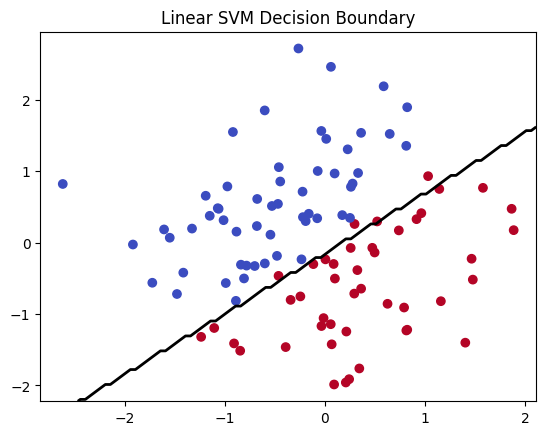

Accuracy: 96.00%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the Linear SVM class
class LinearSVM:
    def __init__(self, learning_rate=0.001, reg_strength=0.1, num_iterations=1000):
        self.learning_rate = learning_rate
        self.reg_strength = reg_strength
        self.num_iterations = num_iterations

    def fit(self, X, y):
        # Initialize weights and bias
        num_samples, num_features = X.shape
        self.W = np.zeros(num_features)  # Weights
        self.b = 0  # Bias

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Compute the margin (decision function)
            margins = 1 - y * (np.dot(X, self.W) + self.b)
            # Compute gradient
            dw = -2 * np.dot(X.T, (y * (margins > 0))) / num_samples + 2 * self.reg_strength * self.W
            db = -2 * np.sum(y * (margins > 0)) / num_samples

            # Update weights and bias
            self.W -= self.learning_rate * dw
            self.b -= self.learning_rate * db

    def predict(self, X):
        # Make predictions
        return np.sign(np.dot(X, self.W) + self.b)

# Generate toy data (binary classification)
np.random.seed(42)
num_samples = 100
X = np.random.randn(num_samples, 2)
y = np.ones(num_samples)
y[X[:, 0] < X[:, 1]] = -1  # Assign different class based on condition

# Train the Linear SVM
svm = LinearSVM(learning_rate=0.001, reg_strength=0.1, num_iterations=1000)
svm.fit(X, y)

# Predict
y_pred = svm.predict(X)

# Visualize the decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
plt.title("Linear SVM Decision Boundary")
plt.show()

# Print accuracy (simple comparison)
accuracy = np.mean(y_pred == y)
print(f"Accuracy: {accuracy * 100:.2f}%")
